In [ ]:
import torch
import torchvision.transforms as T
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the DeepLabV3 pre-trained model
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)
model.eval()

# Define image transformations
def preprocess_image(image_path):
    input_image = Image.open(image_path)
    preprocess = T.Compose([
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return preprocess(input_image).unsqueeze(0)





Using cache found in C:\Users\manik/.cache\torch\hub\pytorch_vision_v0.10.0
c:\Users\manik\Documents\Background Replacement using Segmentation Mask\Backg_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\manik\Documents\Background Replacement using Segmentation Mask\Backg_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
# Segment the foreground
def get_foreground_mask(image_tensor):
    with torch.no_grad():
        output = model(image_tensor)['out'][0]
    output_predictions = output.argmax(0).byte().cpu().numpy()
    return output_predictions == 15  # Class 15 for 'person' in COCO dataset


In [69]:
# Load and process image
image_path = r'C:\Users\manik\Documents\Background Replacement using Segmentation Mask\satwik.jpg'  # Replace with your image path
image_tensor = preprocess_image(image_path)
foreground_mask = get_foreground_mask(image_tensor)




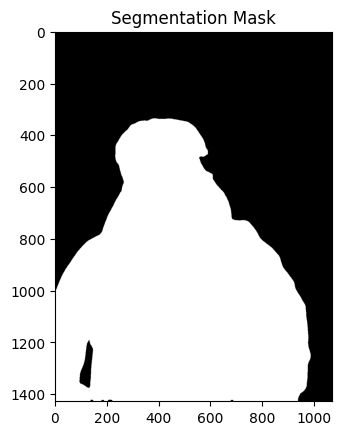

In [70]:
# Display the segmentation mask
plt.imshow(foreground_mask, cmap='gray')
plt.title("Segmentation Mask")
plt.show()


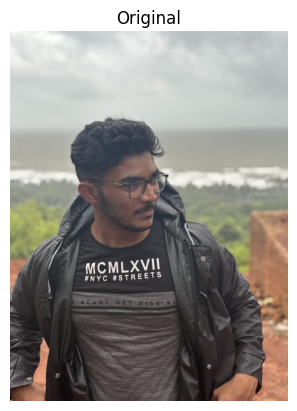

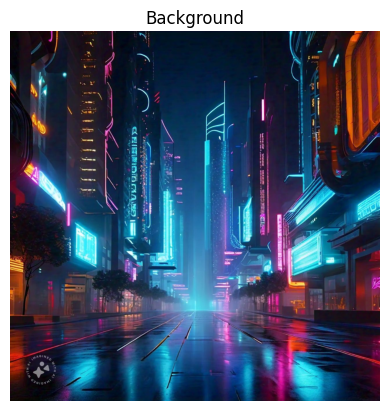

In [76]:
# Load background image and resize it to match the input image size
background_path = r'C:\Users\manik\Documents\Background Replacement using Segmentation Mask\gwenbg.jpg'  # Replace with your background image path
background_image = Image.open(background_path)
input_image = Image.open(image_path)

plt.imshow(input_image)
plt.title("Original")
plt.axis('off')
plt.show()

plt.imshow(background_image)
plt.title("Background")
plt.axis('off')
plt.show()


In [72]:
# Resize background to match input dimensions
background_image = background_image.resize(input_image.size)

# Convert to NumPy arrays
input_image_np = np.array(input_image)
background_image_np = np.array(background_image)

# Blend images based on the segmentation mask
output_image = np.where(foreground_mask[..., None], input_image_np, background_image_np)


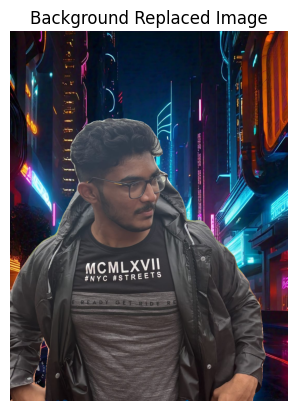

In [73]:
# Display final output
plt.imshow(output_image)
plt.title("Background Replaced Image")
plt.axis('off')
plt.show()

# Save the final image
output_image_pil = Image.fromarray(output_image)
output_image_pil.save('output_with_new_background.jpg')